## 1.1 Load & Inspect

In [2]:
import pandas as pd

In [3]:
diab = pd.read_csv(r"data\diabetes.csv")

In [4]:
diab.info() # Different columns, their datatypes, and count of occupied spaces

# Memory usage is minuscule at 54.1 KB only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Example summary:
* Count of total records: 768
* Mean count of pregnancies: 3.85/woman
* Std deviation (spread) of BMI: 7.9 
* Smallest Insulin reading: 0    *(Type1 or late-Type2 diabetes)*
* Highest Insulin reading: 846    *(severely diabetic!)*
* Median (50th percentile) BMI: 32    *(obese, class1)*

In [9]:
diab.head() # Top 5 rows for quick overview

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
positive_count = diab["Outcome"].value_counts()[1]
positive_count, (268/768)*100 #(proportion)

(268, 34.89583333333333)

There are 268 active cases of diabetes (comprising 35% of samples)

In [5]:
negative_count = (diab["Outcome"] == 0).sum()
negative_count, (1-(268/768))*100 #(proportion)

(500, 65.10416666666667)

There are 500 negative cases of diabetes (comprising 65% of samples)

### Conlusion: 

1. #### Class imbalance:
   * Dataset is not evenly distributed between both classes
   * Non-diabetic cases (majority class, 65%) dominate diabetic cases (minority class, 35%)

2. #### Machine-Learning implications:
   * A ML model trained on this data may favor predicting the majority class (non-diabetic) due to bias

3. #### Real-world context:
   * 35% diabetic rate is extremely high relative to global prevalence (8-10%)

## 1.2 Visualization

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
diab_df = pd.DataFrame(diab)

#### Histogram for numeric features (i.e. Age)

C:\Users\muzam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


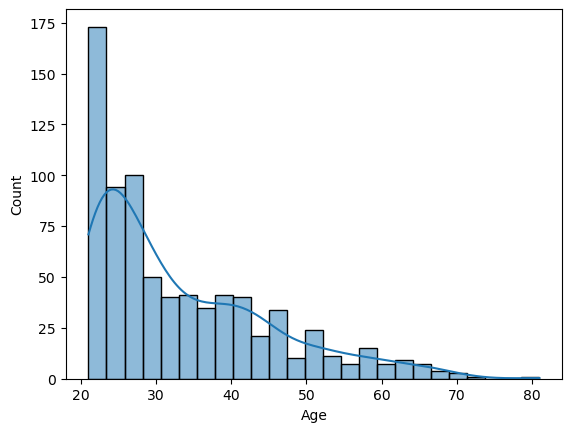

In [7]:
sns.histplot(diab["Age"], kde=True, bins=25);

In [10]:
count_ages_between_20_30 = len(diab[(diab["Age"] > 20) & (diab["Age"] < 30)])
print("Patients who are between 20-30 years old: ", count_ages_between_20_30, "\n", "Proportion: ", (count_ages_between_20_30/768)*100, "%")

Patients who are between 20-30 years old:  396 
 Proportion:  51.5625 %


Majority of patients are between ages 20-30, potentially indicating a stronger bias towards predicting younger patients)

#### However, this does not take into account any outliers

In [51]:
skewness_age = 3 * ((33.240885 - 29.000000) / 11.760232)
skewness_age 

1.081837076003262

In [55]:
diab.describe().mean()["Age"] - diab.describe().median()["Age"] 

95.00469691133483

#### Significant difference between mean age and median age, indicating strong effect of outliers

### Removing outliers

In [94]:
median_age = diab.describe().median()["Age"]
std_dev_age = 11.76
iqr_age = 41 - 24
upper_limit = (41 + 1.5*(iqr)) # OUTPUT: 66.5
lower_limit = 24 - 1.5*(iqr) # OUTPUT: -1.5

In [95]:
outliers = len(diab[diab["Age"] > 66.5])
print(f"Number of outliers: {outliers}")

Number of outliers: 9


In [106]:
diab_clean = diab[diab["Age"] <= 66.5] # without outliers
actual_mean_age = diab_clean["Age"].mean()
print(f"Mean without outliers: {actual_mean_age}")

Mean without outliers: 32.80500658761528


In [107]:
actual_skew = 3*(( actual_mean_age - median_age) / std_dev_age)
actual_skew

0.42973568349029323

#### Therefore, because the skewness is `< 0.5` but `> 0`, we can say that it is weakly positively skewed.

##### Reason: 51.6% of the sample patients are between Ages 20 and 30 
(which is in the first quartile range)

## 1.3 Correlation Analysis

In [8]:
num_df = diab_df.select_dtypes(include=["int"]) # Takes all the numerical columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
0,6,148,72,35,0,50,1
1,1,85,66,29,0,31,0
2,8,183,64,0,0,32,1
3,1,89,66,23,94,21,0
4,0,137,40,35,168,33,1
...,...,...,...,...,...,...,...
763,10,101,76,48,180,63,0
764,2,122,70,27,0,27,0
765,5,121,72,23,112,30,0
766,1,126,60,0,0,47,1


#### Pearson's coefficient applied to get a linear estimate of correlation

In [10]:
correlation = num_df.corr(method='pearson')
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,-0.042163,0.130548
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.238356,1.000000


### Example summary
#### Correlation between:
* Pregnancies and Age is `0.544` (Moderate positive correlation)

Age directly impacts the decision

* Age and Insulin levels is `-0.042` (nearly 0 correlation)

Insulin levels not affected by Age

* Age and Skin Thickness is `-0.114` (Very weak negative correlation)

Increase in Age may cause a very small decrease in skin thickness (negligible)

### Visualize with a heatmap

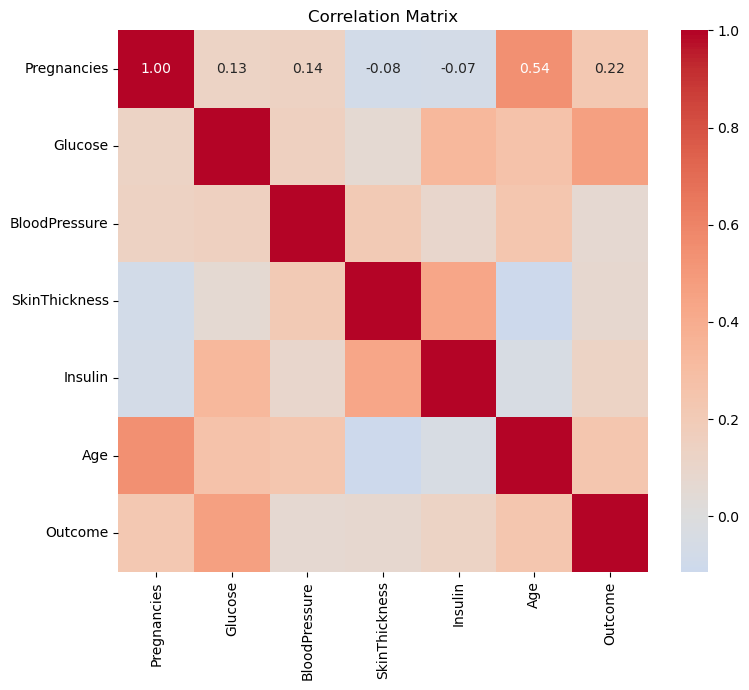

In [49]:
plt.figure(figsize=(8, 7)); # Scaling for readability
plt.title('Correlation Matrix')
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", center=0);
plt.tight_layout(); # Prevent overlapping of boundaries
plt.show();